In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
import os
import scipy
import cv2
%matplotlib inline
sns.set_style('white')

In [10]:
from vzam import *

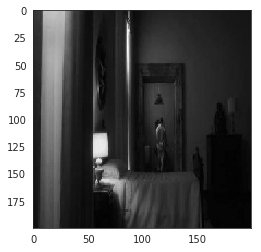

In [11]:
test_img = 'test_images/img2.jpg'

img = Image.open(test_img).convert('L').resize((200, 200))

nimg = np.array(img)

plt.imshow(nimg, cmap='gray', vmin=0, vmax=256)
plt.show()

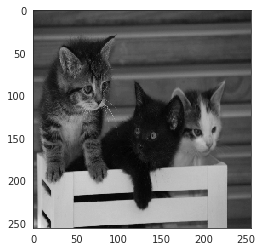

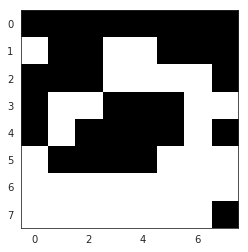

In [12]:
img = Image.open('test_images/cats_grey.jpg').convert('L').resize((256, 256))
plt.imshow(img, vmin=0, vmax=256, cmap='gray')
plt.show()
plt.imshow(rHash(img).reshape((8, 8)), vmin=0, vmax=1, cmap='gray')
plt.show()

In [13]:
IMAGES_DIR = 'test_images'

In [14]:
fnames = [os.path.join(IMAGES_DIR, fname) for fname in os.listdir(IMAGES_DIR)]
imnames = [fname for fname in os.listdir(IMAGES_DIR)]
images = [ cv2.imread(fname) for fname in fnames]
pil_images = [ Image.fromarray(img).convert('L').resize((256, 256)) for img in images]

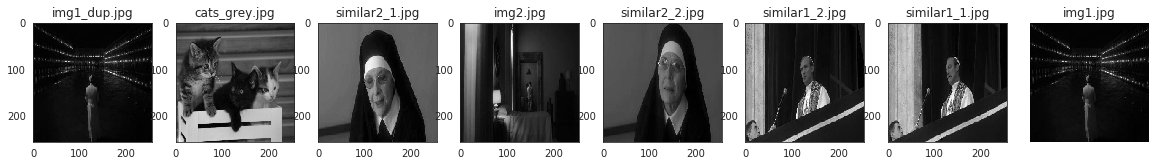

In [15]:
plt.figure(figsize=(20, 10))
i = 0
for img in pil_images:
    plt.subplot(1, len(images), i+1)
    plt.title(imnames[i])
    plt.imshow(img, cmap='gray')
    i+=1
plt.axis('off')
plt.show()

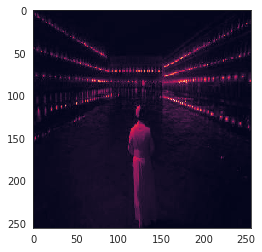

In [16]:
plt.imshow(pil_images[0])
plt.show()

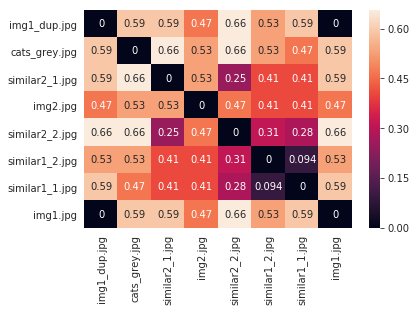

In [17]:
hashes = [quandrant_rHash(img) for img in pil_images]
distances = scipy.spatial.distance.cdist(hashes, hashes, metric='hamming')   
sns.heatmap(distances, annot=True, xticklabels=imnames, yticklabels=imnames)

In [18]:
fingerprint = hashes[0]

word_length = 8
n_words = len(fingerprint) // word_length
n_words

8

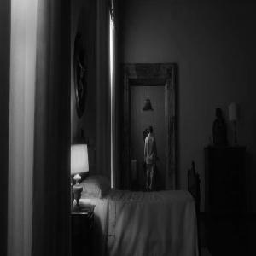

In [52]:
target_img = pil_images[3]
target_img

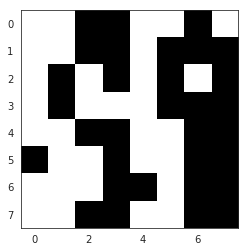

In [53]:
plt.imshow(quandrant_rHash(target_img).reshape((8,8)), vmin=0, vmax=1, cmap='gray')

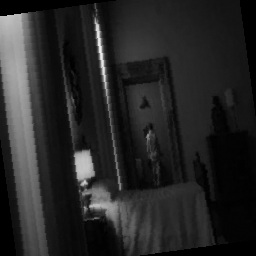

In [78]:
corrupted_target_img = random_corrupt(target_img)
corrupted_target_img

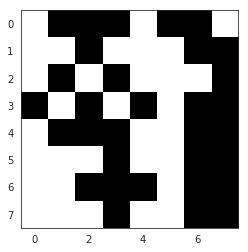

In [79]:
plt.imshow(quandrant_rHash(corrupted_target_img).reshape((8,8)), vmin=0, vmax=1, cmap='gray')

In [80]:
scipy.spatial.distance.cdist([quandrant_rHash(target_img)], [quandrant_rHash(corrupted_target_img)], metric='hamming')


array([[0.21875]])